# LENDING CLUB:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# I) EXPLORATORY DATA ANALYSIS:

In [ ]:
df=pd.read_csv("/content/loan_data.csv")

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment**: The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc**: The natural log of the self-reported annual income of the borrower.

**dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line**: The number of days the borrower has had a credit line.

**revol.balc**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



## 1) Credit Policy:

In [ ]:
cp=pd.DataFrame(df["credit.policy"].value_counts())

In [ ]:
cp.index.values

array([1, 0])

In [ ]:
rej=(cp.iloc[1]/cp["credit.policy"].sum())*100
accepted=(cp.iloc[0]/cp["credit.policy"].sum())*100

In [ ]:
cp1=[rej, accepted]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x7fe9d2907510>,
 [Text(0.8999045323342554, 0.6325913631122901, 'rejected'),
  Text(-0.8999045323342554, -0.6325913631122901, 'accepted')])

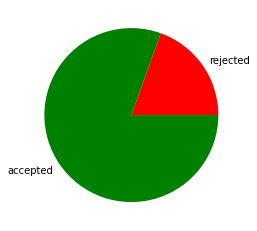

In [ ]:
plt.pie(cp1, colors=("red", "green"),labels=("rejected", "accepted"))

In [ ]:
print("accepted loans from total=", accepted)

accepted loans from total= credit.policy    80.496972
Name: 1, dtype: float64


**OF ALL the applicants 80.5% met the credit underwriting criteria of LendingClub.com**

## 2) Purpose and loan default:

In [ ]:
purpose=pd.DataFrame(df["purpose"].value_counts()) 

,purpose
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


<Figure size 864x864 with 0 Axes>

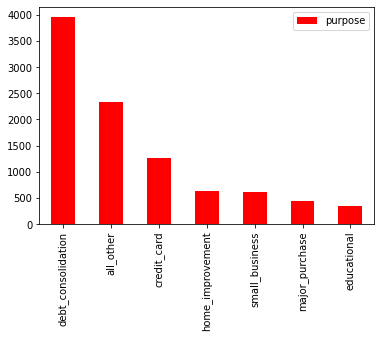

In [ ]:
plt.figure(figsize=(12, 12))
purpose.plot.bar(color= "red")
purpose

From above analysis we see that **most** loans are taken for **Debt Consolidation**
 and **least** number of loans are taken are **Educational Loans**  

**default rate based on purpose:**



In [ ]:
default_rate = pd.DataFrame({"purpose":df["purpose"],"default":df["not.fully.paid"]})
default_rate = default_rate.pivot_table(columns="purpose", values= "default")
default_rate

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
default,0.166023,0.115689,0.152388,0.201166,0.170111,0.112128,0.277868


**small business loans** have the **highest default rate (27.78%)** and **major purchase loans have the least (11.20%)**

## 2) Interest Rate and default:


In [ ]:
ir=pd.DataFrame({'int.rate': df["int.rate"], "default":df["not.fully.paid"]})

In [ ]:
filter1=ir["default"]==1
ir2=ir[filter1]
filter2=ir["default"]!=1
ir3= ir[filter2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


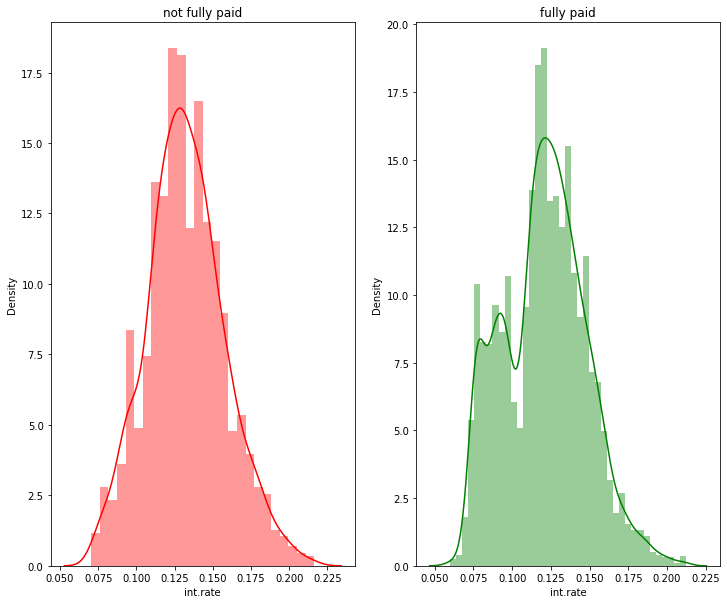

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title("not fully paid")
sns.distplot(ir2["int.rate"], color="red")
plt.subplot(1,2,2)
plt.title("fully paid")
sns.distplot(ir3["int.rate"], color="green")

**From above graphs we see that 
1) the largest distribution of defaulters lie in the interest range of 12.5% to 15%.
2) the largest distribution of people who pay back are in the interest range of 10% to 12.5%.
3) comparing the two graphs we see that number of defaulters are higher when interest rate is higher than 17%** 


## 3) Log annual income and default:

In [ ]:
lai=pd.DataFrame({"lai":df["log.annual.inc"],"default":df["not.fully.paid"]})

In [ ]:
lai1=lai[filter1]
lai2=lai[filter2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


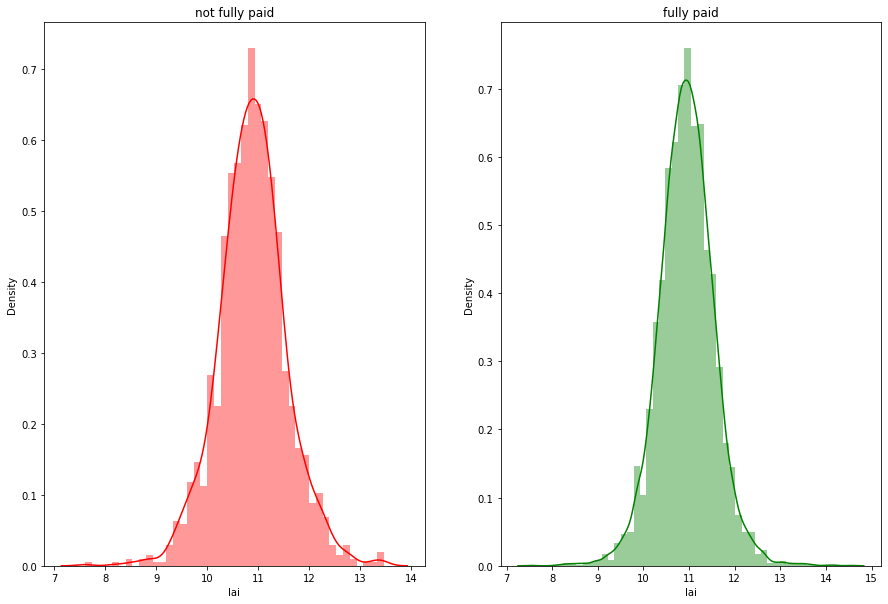

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("not fully paid")
sns.distplot(lai1["lai"], color= "red")
plt.subplot(1,2,2)
plt.title("fully paid")
sns.distplot(lai2["lai"], color="green")

**1) Here we see that loans are approved when people have a r
egisterd log income between 9 and 13 where largest number of approved loan
s are at log income 11.
2) We also see that number of defaulters increase when registered log income is greater than 12.**

## 4) DTI and default:

In [ ]:
dti=pd.DataFrame({"dti":df["dti"],"default":df["not.fully.paid"]})

In [ ]:
dti1=dti[filter1]
dti2=dti[filter2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


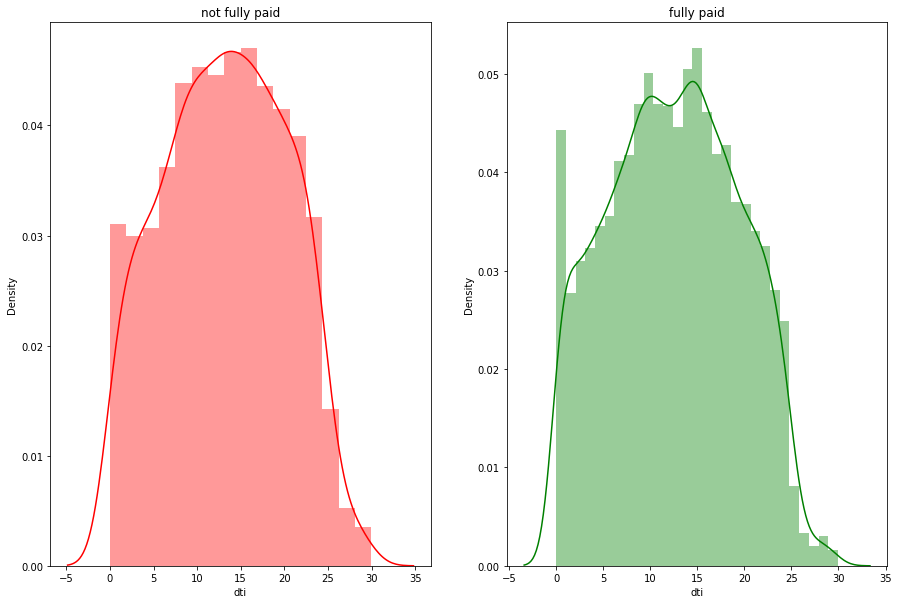

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("not fully paid")
sns.distplot(dti1["dti"], color= "red")
plt.subplot(1,2,2)
plt.title("fully paid")
sns.distplot(dti2["dti"], color="green")

**Obseriving the above graphs we see that there is a higher density of defaulters when dti ratio is greater than 27** 

## 5) Fico and default: 

In [ ]:
fico=pd.DataFrame({"fico":df["fico"],"default":df["not.fully.paid"]})

In [ ]:
fico1= fico[filter1]
fico2= fico[filter2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


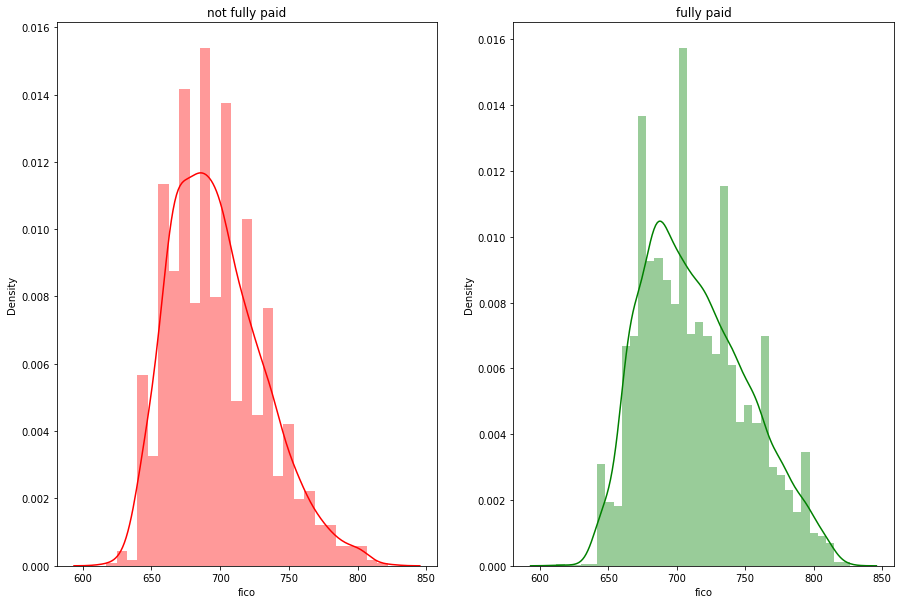

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("not fully paid")
sns.distplot(fico1["fico"], color= "red")
plt.subplot(1,2,2)
plt.title("fully paid")
sns.distplot(fico2["fico"], color="green")

**Density of defaulters is high between fico score 600 and 700.**

## 6) Public Record and default:

In [ ]:
pub_rec=pd.DataFrame({"pub.rec":df["pub.rec"],"default":df["not.fully.paid"]})

In [ ]:
pub_rec

,pub.rec,default
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9573,0,1
9574,0,1
9575,0,1
9576,0,1


In [ ]:
pub_rec1=pub_rec[filter1]
pub_rec2=pub_rec[filter2]

In [ ]:
prdefaulters=pub_rec1["pub.rec"].value_counts()

In [ ]:
prfullypaid=pub_rec2["pub.rec"].value_counts()

0    1395
1     136
2       2
Name: pub.rec, dtype: int64


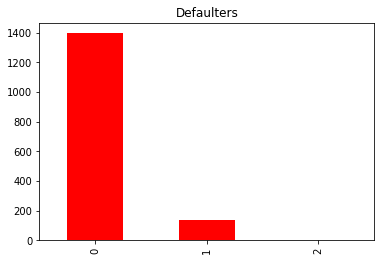

In [ ]:
plt.subplot(title= "Defaulters")
prdefaulters.plot.bar(color="red")
print(prdefaulters)

0    7624
1     397
2      17
3       5
5       1
4       1
Name: pub.rec, dtype: int64


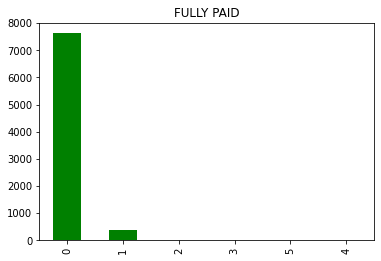

In [ ]:
plt.subplot(title= "FULLY PAID")
prfullypaid.plot.bar(color="green") 
print(prfullypaid)

## 7) Checking label column to confirm if data is balanced:

In [ ]:
nfp=df["not.fully.paid"].value_counts()
nfp

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [ ]:
nfp.loc[0]/nfp.loc[1]

5.247879973907371

In [ ]:
(nfp.loc[1]/(nfp.loc[0]+nfp.loc[1]))*100

16.005429108373356

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


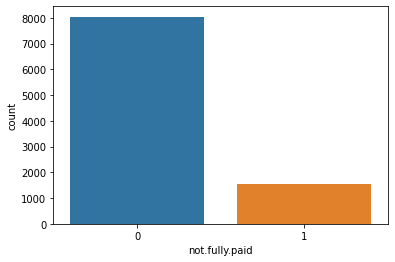

In [ ]:
sns.countplot(df["not.fully.paid"])

**1) Data for non defaulters is 5.3 times more than defaulters (imbalanced data)**
 and **2) only 16 % of total borrowers defaulted**

# II)Encoding Catogorical Data:

Highest number of loans approved were where fico score is between 650 and 700. 

In [ ]:
df2=pd.get_dummies(df)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

# III) Checking Correlation.

In [ ]:
dfcorr=df2.corr()

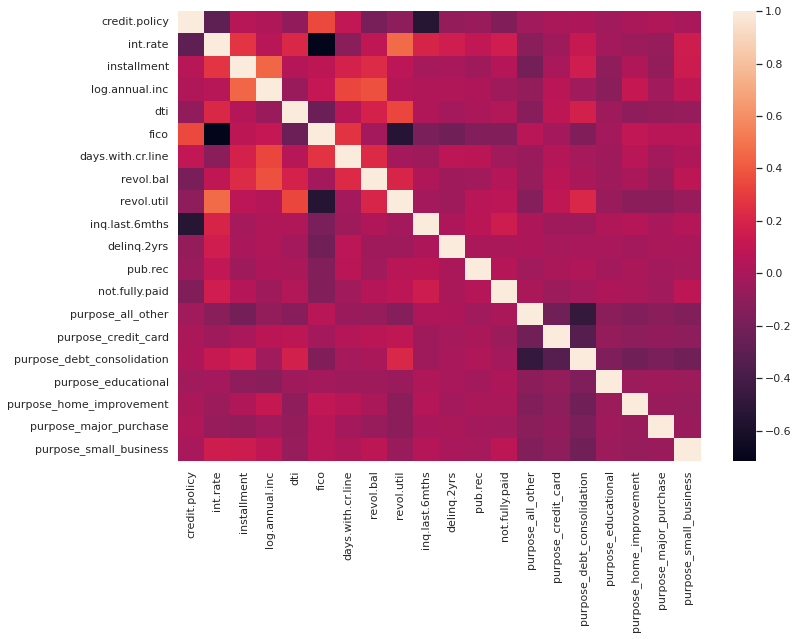

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dfcorr)

**As seen above there are no features with high correlation to each other**

# IV) Checking and handling Outliers:




In [ ]:
#DROPPNG BINARY AND CATOGORIAL COLUMNS:
dfoutliers= df.drop(["credit.policy","purpose","not.fully.paid"], axis=1)

In [ ]:
dfoutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int.rate           9578 non-null   float64
 1   installment        9578 non-null   float64
 2   log.annual.inc     9578 non-null   float64
 3   dti                9578 non-null   float64
 4   fico               9578 non-null   int64  
 5   days.with.cr.line  9578 non-null   float64
 6   revol.bal          9578 non-null   int64  
 7   revol.util         9578 non-null   float64
 8   inq.last.6mths     9578 non-null   int64  
 9   delinq.2yrs        9578 non-null   int64  
 10  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 823.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fe9c5879150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe9c5880110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9c5889150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9c5880bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe9c5879650>,
  <matplotlib.lines.Line2D at 0x7fe9c5879b90>]}

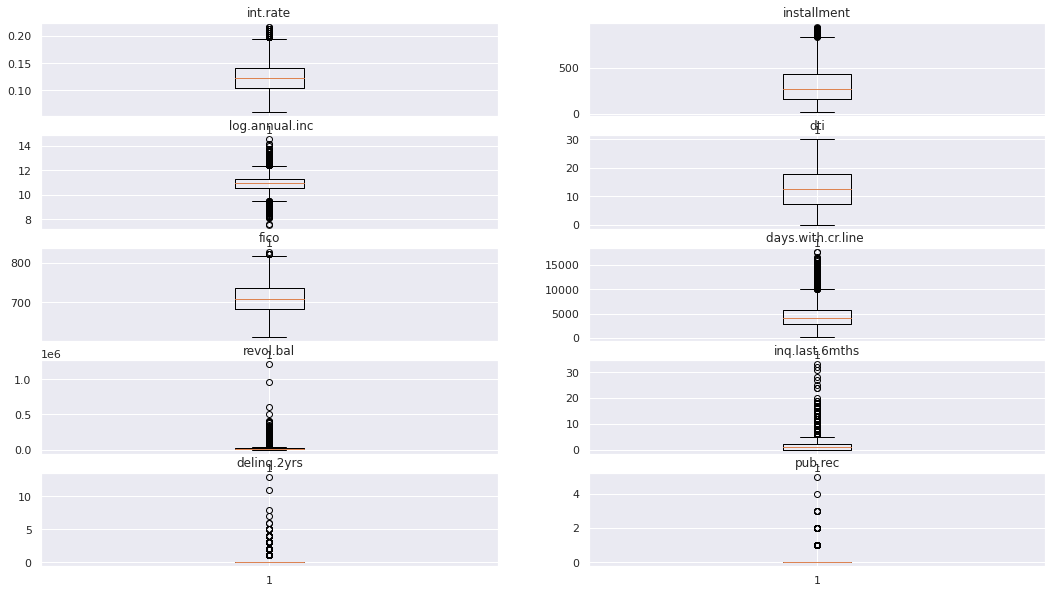

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(5,2,1)
plt.title('int.rate')
plt.boxplot(dfoutliers["int.rate"])
plt.subplot(5,2,2)
plt.title('installment')
plt.boxplot(dfoutliers["installment"])
plt.subplot(5,2,3)
plt.title (" log.annual.inc")
plt.boxplot(dfoutliers["log.annual.inc"])
plt.subplot(5,2,4)
plt.title('dti')
plt.boxplot(dfoutliers['dti'])
plt.subplot(5,2,5)
plt.title('fico')
plt.boxplot(dfoutliers['fico'])
plt.subplot(5,2,6)
plt.title('days.with.cr.line ')
plt.boxplot(dfoutliers['days.with.cr.line'])
plt.subplot(5,2,7)
plt.title('revol.bal')
plt.boxplot(dfoutliers['revol.bal'])
plt.subplot(5,2,8)
plt.title('inq.last.6mths')
plt.boxplot(dfoutliers['inq.last.6mths'])
plt.subplot(5,2,9)
plt.title('delinq.2yrs')
plt.boxplot(dfoutliers['delinq.2yrs'])
plt.subplot(5,2,10)
plt.title('pub.rec')
plt.boxplot(dfoutliers['pub.rec'])





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


827

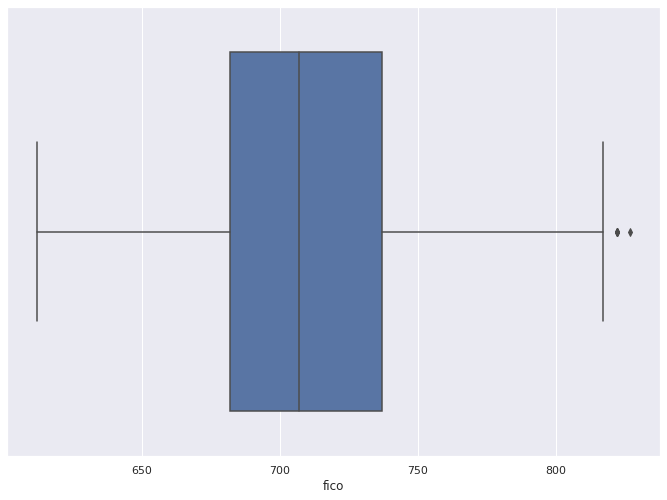

In [ ]:
sns.boxplot(df2["fico"])
df2["fico"].max()

In [ ]:
drop=df2["fico"].sort_values(ascending= False)
drop.head(20)

1613    827
154     822
1477    822
2495    822
2476    822
1883    822
1455    817
5950    817
4076    817
2084    817
1985    817
830     817
6533    812
1118    812
6590    812
5650    812
113     812
6544    812
4701    812
6599    812
Name: fico, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9572 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9572 non-null   int64  
 1   int.rate                    9572 non-null   float64
 2   installment                 9572 non-null   float64
 3   log.annual.inc              9572 non-null   float64
 4   dti                         9572 non-null   float64
 5   fico                        9572 non-null   int64  
 6   days.with.cr.line           9572 non-null   float64
 7   revol.bal                   9572 non-null   int64  
 8   revol.util                  9572 non-null   float64
 9   inq.last.6mths              9572 non-null   int64  
 10  delinq.2yrs                 9572 non-null   int64  
 11  pub.rec                     9572 non-null   int64  
 12  not.fully.paid              9572 non-null   int64  
 13  purpose_all_other           9572 

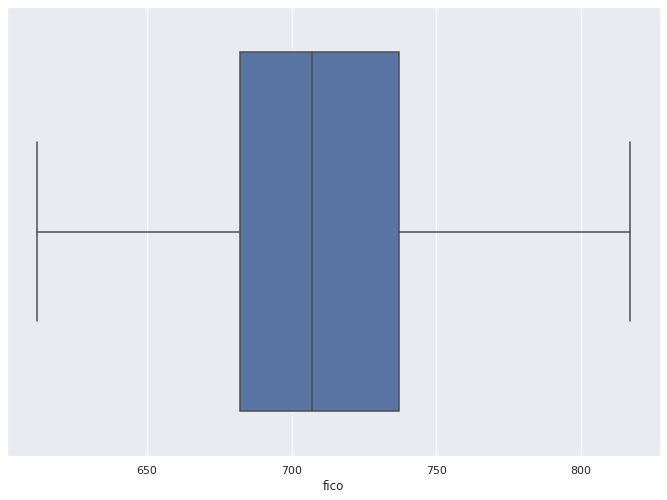

In [ ]:
#Removing Rows with fico > 820
filter = df2['fico']<820
df2_new= df2[filter]
sns.boxplot(df2_new["fico"])
df2_new.info()



  


A TOTAL OF SIX ROWS WERE DROPPED.

# V) PREPRCOCESSING :
## 1) Splitting data:

In [ ]:
from sklearn.model_selection import train_test_split
dx= df2_new.drop(["not.fully.paid"],axis= 1)
dy= df2_new["not.fully.paid"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(dx,dy)

## 2) Oversampling train data using SMOTE:


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
xn_train,yn_train=smote.fit_resample(x_train,y_train)

In [ ]:
xn_train.shape

(12058, 19)

In [ ]:
yn_train.shape

(12058,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


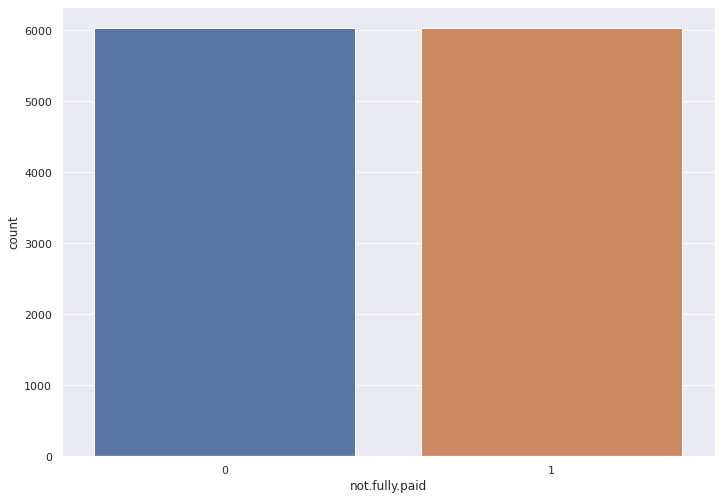

In [ ]:
sns.countplot(yn_train)

## 2) SCALING:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [ ]:
x_trainsc= sc.fit_transform(xn_train)
x_testsc= sc.transform(x_test)

# VI) BUILDING A MODEL USING KERAS AND TENSORFLOW:

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD


## 1) Defining:

In [ ]:

model= Sequential()
model.add(Dense(76, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(38, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense (19, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## 2) Fitting:


In [ ]:
model.fit(x_trainsc,yn_train, epochs=30,batch_size = 300 ,verbose=0,validation_data=(x_testsc, y_test))

## 3)Accuracy testing:

In [ ]:

_, train_acc = model.evaluate(x_trainsc, yn_train, verbose=0 )
_, train_acc

(0.3350335955619812, 0.8428429365158081)

In [ ]:
y1pred=(model.predict(x_trainsc) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report
target_names= ["0", "1"]
print(classification_report(yn_train,y1pred,target_names=target_names ))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      6029
           1       0.92      0.75      0.83      6029

    accuracy                           0.84     12058
   macro avg       0.85      0.84      0.84     12058
weighted avg       0.85      0.84      0.84     12058



In [ ]:
_, test_acc = model.evaluate(x_testsc,y_test, verbose=0)
_, test_acc

(0.4591967463493347, 0.8002507090568542)

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.843, Test: 0.800


## 4) Predicting: 

In [ ]:
y_pred=(model.predict(x_testsc))

In [ ]:
y_pred=(model.predict(x_testsc) > 0.5).astype("int32")

In [ ]:
y_test

3692    0
2569    0
1068    0
5540    0
2427    0
       ..
9104    0
8947    0
1799    0
5004    0
4656    0
Name: not.fully.paid, Length: 2393, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
target_names= ["0", "1"]
print(classification_report(y_test,y_pred,target_names=target_names ))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2011
           1       0.27      0.15      0.19       382

    accuracy                           0.80      2393
   macro avg       0.56      0.54      0.54      2393
weighted avg       0.76      0.80      0.77      2393



In [ ]:
(y_pred.flatten()==y_test).value_counts()

True     1915
False     478
Name: not.fully.paid, dtype: int64

In [ ]:
df_test=df2.sample(n=20)
df_y=df_test["not.fully.paid"]
df_test=df_test.drop(["not.fully.paid"], axis=1)

In [ ]:
df_test=sc.fit_transform(df_test)

In [ ]:
df_pred=(model.predict(df_test).flatten() > 0.5).astype("int64")

In [ ]:
df_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print("number of mislabeled points out of %d points= %d" %(df_test.shape[0], (df_pred!=df_y).sum()))

number of mislabeled points out of 20 points= 2
